# <h1 style="font-size:30px;text-align: center;">Algorithmes gloutons </h1>
    
<h1 style="font-size:30px;text-align: center;">Problèmes, Applications, Alternatives</h1> 

<span style="font-size:18px;color:red;">DIU EIL 2019</span>
    
<span style="font-size:16px;color:red;">BLOC 2 Projet</span>

<span style="font-size:16px;color:red;">@auteurs: Missonnier Fabrice    -    Donet Julien -         Baldi François     -       Grange Gilles</span>

## <h2 style="font-size:30px;color:green;text-indent:80px;">I- Objectifs</h2>

Nous nous proposerons d'introduire,aux travers d'exemple de problème simples, diverses approches des algorithmes dits "gloutons", et terminerons par les alternatives à ceux-ci les plus courantes.

## <h2 style="font-size:30px;color:green;text-indent:80px;">II- Algorithmes gloutons , Définition</h2>


Parmi tous les problèmes posés, certains peuvent être traités par un algorithme Glouton. 
Le principe de tels algorithmes consiste à choisir des solutions locales optimales d'un problème dans le but d'obtenir une solution optimale globale. 

Plutôt que de parcourir tout le champ des possibilités et choisir la solution optimale globale parmi celles-ci, on se restreint, étapes après étapes à faire un choix optimum local. La résolution du problème revient alors à résoudre de façon récursive un sous problème "plus simple"

Ce que l'on gagne en rapidité d'éxécution, on le perd en efficacité. La solution au problème est rapidement trouvée mais rien ne garantit qu'elle soit optimale.

Dans certains problèmes, il existe plusieurs choix d'optimisation possible. On se posera alors systématiquement les questions que soulèvent tous les algorithmes Glouton, à savoir si le choix est pertinent et si l'optimisation est globale ou non.

Lorsqu'on a besoin d'une solution optimale que l'algo glouton ne peut nous fournir, on lui préfèrera une alternative dont une liste non exhautive sera proposé à la fin de ce cours.

## <h2 style="font-size:30px;color:green;text-indent:80px;">III- Algorithme ou heuristique gloutonne ?</h2>

Lorsque la solution trouvée n'est pas optimale,appellée aussi sous-optimale, on parle alors d'heuristique gloutonne. 

Un simple contre exemple permet de montrer que c'est une heuristique.

Un contrexemple est développé dans la partie IV 1) et montre que l'algorithme glouton de rendu de monnaie est une heuristique.

Montrer que l'on a bien trouvé une solution optimale est bien plus complexe:

Sans rentrer dans le détail, on peut entre autre, démonstrer qu'une solution est optimale par l'absurde : on emet l'hypothèse que la solution n'est pas optimale et l'on arrive à une contradiction

Cela dépasse le cadre de notre étude.


## <h2 style="font-size:30px;color:green;text-indent:80px;">IV- Les Algorithmes gloutons les plus connus</h2>
Nous présenterons ici les algorithmes suivants

1- Rendu de monnaie

2- Sac à dos

3- Épreuves dans le gymnase

4- Dijkstra

5- Coloration des sommets d’un graphe

### <span style="color:red"> 1) Les pièces de Monnaie</span>

@author: Gilles

<span style="color:red;margin-left: 70px;font-size:18px;">Problématique</span>

Dans un distributeur de boisson, on dispose de pièces de monnaie de 100,50,20,10,5,2,1 Francs XPF.
    
On cherche une méthode gloutonne qui rends la monnaie en utilisant le moins de pièces possibles.

<span style="color:red;margin-left: 70px;font-size:18px;">Résolution</span>

Choix optimum local : On considère que si l'on rends la monnaie avec des pièces de plus grandes valeurs possibles, on peut estimer que la solution sera très proche voire équivalente à la solution optimale globale.

Dans le système de pièces polynésien, on est bien en présence d'un algorithme glouton qui donnera la solution optimale.

Par contre, si l'on considère le système de pièces suivant : 1,3,4 F,

et si l'on doit rendre 6F, on s'aperçoit que l'on est en présence d'une heuristique gloutone qui rendra une pièce de 4F et deux pièces de 1F; 

La solution optimale étant deux pièces de 3F. 

<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

In [1]:
#Rendu de monnaie par algo glouton
#boucle while
#Complexité O(N)

pieces=[100,50,20,10,5,2,1]

def rendu_monnaie(montant,syst_monnaies):
	nb_pieces=[0,0,0,0,0,0,0]
	for i in range (len(syst_monnaies)):  
		while montant >=syst_monnaies[i]:
			montant -=syst_monnaies[i]
			nb_pieces[i] +=1
	assert montant == 0
	return(nb_pieces)

print(rendu_monnaie(86,pieces))


[0, 1, 1, 1, 1, 0, 1]


L'implémentation sous forme récursive est intéressante car au plus proche de la démarche de l'algorithme glouton:

In [2]:
#Rendu de monnaie par algo glouton
#Fct récursive
#Complexité O(N)

nb_pieces=[0,0,0,0,0,0,0]

def rendu_monnaie(montant,index,nb_pieces):
	pieces=[100,50,20,10,5,2,1]
	if montant == 0	:
		print(nb_pieces)	
	elif montant >=pieces[index]:
		montant -=	pieces[index]
		nb_pieces[index] +=1
		rendu_monnaie(montant,index,nb_pieces)   # sous-problème : la somme à rendre est plus petite
	else:
		rendu_monnaie(montant,index+1,nb_pieces)


rendu_monnaie(259,0,nb_pieces)


[2, 1, 0, 0, 1, 2, 0]


### <span style="color:red"> 2) Le sac à dos</span>

@author: Fabrice

<span style="color:red;margin-left: 70px;font-size:18px;">Problématique</span>

Enoncé du problème est simple : "Étant donné un ensemble d'éléments où chaque élément contient un poids et une valeur, déterminez le nombre de chacun à inclure dans une collection afin que le poids total soit inférieur ou égal à une limite donnée et que la valeur totale soit aussi grande que possible.".

Ce problème fait partie des 21 problèmes NP-complets identifiés par Richard Karp en 1972. Ils sont NP-complets.

On retrouve ce problème du sac à dos dans de nombreux domaines :
- en informatique financière, pour le calcul d'investissements (plusieurs projets, lesquels choisir pour que l'ensemble rapporte le plus d’argent possible)
- dans l'industrie, pour la découpe de matériaux par exemple, afin de minimiser les pertes dues aux chutes
- dans l'optimisation du chargement de cargaisons
- au début de la cryptographie, malgré de nombreuses "portes dérobées" algorithmiques
- etc.


Il existe deux variantes de résolution de ce problème. 
La variante *entière* : chaque objet doit soit être pris soit abandonné, on ne peut pas prendre une partie d’objet ni prendre un objet plus d’une fois. Exemple d'ennoncé du problème : "un voleur dévalisant un magasin trouve n objets ; le ième objet vaut vi euros, et pèse wi kilogrammes, avec vi et wi entiers. Il veut que son butin ait la plus grande valeur possible, mais ne peut pas porter plus de W kilos dans son sac-à-dos, pour un certain entier W. Quels objets devra-t-il prendre ?"

Dans la variante *fractionnaire* du problème du sac-à-dos, le principe est le même, mais le voleur peut prendre des fractions d’objets, au lieu d’avoir un choix binaire (oui ou non) pour chacun. 

Nous ne verrons dans cet exemple que la variante "entière".

<span style="color:red;margin-left: 70px;font-size:18px;">Formalisation mathématique</span>

Soit 
 - W le poids maximal d'un sac à dos 
 - n le nombre d'objets que l'on peut potentiellement placer dans le sac
 - Pour chaque objet i, son poids $w_i$ et une valeur $p_i$ (la valeur de l'objet en Euros, par exemple).*
 
 
 Pour un contenu ''X'' donné, la valeur totale contenue dans le sac correspond à l'égalité suivante : $z(X) = \sum_{i=1}^n x_ip_i$

De même, la somme des poids des objets choisis est : $w(X) =\sum_{\{i, \, x_i=1\}} w_i = \sum_{i=1}^n x_iw_i $

On ajoute généralement les contraintes suivantes afin d'éviter les cas singuliers :
- on ne peut pas mettre tous les objets;
- aucun objet n'est plus lourd que ce que le sac peut porter ;
- tout objet a une valeur et apporte un gain ;
- tout objet a un certain poids et consomme des ressources.

Exemple <br/>
Soient quatre objets (n=4) avec un sac à dos d’un poids maximal de 30kg (P = 30).<br/>
Chaque objet a un couple (poids, valeur) suivant 
<table>
<tr>
<td width="60">Objets</td>
<td width="60">
<div align="right">1</div>
</td>
<td width="60">
<div align="right">2</div>
</td>
<td width="60">
<div align="right">3</div>
</td>
<td width="60">
<div align="right">4</div>
</td>
</tr>
<tr>
<td>
<div align="center"><em>w<sub>i</sub></em></div>
</td>
<td>
<div align="right">7</div>
</td>
<td>
<div align="right">4</div>
</td>
<td>
<div align="right">3</div>
</td>
<td>
<div align="right">3</div>
</td>
</tr>
<tr>
<td>
<div align="center"><em>p<sub>i</sub></em></div>
</td>
<td>
<div align="right">13</div>
</td>
<td>
<div align="right">12</div>
</td>
<td>
<div align="right">8</div>
</td>
<td>
<div align="right">10</div>
</td>
</tr>
On définit la contraintes du problème : la somme des poids de tous les objets dans le sac doit être inférieure ou égale au poids maximal du sac à dos.

<span style="color:red;margin-left: 70px;font-size:18px;">Résolution</span>

Il y a deux méthodes de résolution du problème :
- la *méthode approchée* qui recherche un compromis et trouvera une solution non optimale. C'est une méthode __heuristique__.
- la *méthode exacte* (force brute) qui va créer un arbre avec toutes les solutions possibles. Cette solution est __optimale__ (voir partie 5.1). 



### Méthode approchée (heuristique gloutone)

La méthode gloutonne ne retourne pas toujours un résultat optimal. La non optimalité d'une heuristique gloutonne est simple à prouver, il suffit de trouver un contre-exemple où la solution gloutonne n’est pas la meilleure. Par contre, démontrer l'optimalité est plus difficile. Il existe cependant une approche générique (voir ci-dessous "preuve de l'optimalité".

On peut commencer par essayer de montrer qu'il existe une solution optimale contenant le premier élément choisi par la méthode gloutonne. Cela se fait souvent en échangeant un élement d’une solution optimale avec ce premier élément.

Une fois cela fait, on montre qu’une solution optimale du sous-problème qui en résulte, combinée avec ce premier choix glouton, est une solution optimale au problème d’origine. Cela se fait souvent en utilisant une preuve par l’absurde.

Les algorithmes pour problèmes d’optimisation exécutent en général une série d’étapes, chaque étape proposant un ensemble de choix. Un algorithme glouton fait toujours le choix qui lui semble le meilleur sur le moment. Autrement dit, il fait un choix localement optimal dans l’espoir que ce choix mènera à une solution globalement optimale.

<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

Voici une méthode approchée pour un algorithme glouton du sac à dos :
- calculer la valeur (pi / wi) pour chaque objet i,
- trier tous les objets par ordre décroissant de cette valeur,
- sélectionner les objets un à un dans l’ordre du tri et ajouter l’objet sélectionné dans le sac si le poids maximal reste respecté.

In [38]:
objetsDepart = [(1,(7,13)), (2,(4,12)), (3,(3,8)), (4,(3,10))]

On trie la liste de tuples selon le rapport $v_i / p_i$

In [33]:
objetsTrie = sorted(valDep, key=lambda x: x[1][0]/x[1][1], reverse=True)
#vérification
print(objetsTrie)
for obj in objetsTrie:
    print("objet numéro : ", obj[0], "valeurs : ",  obj[1], "rapport : ", obj[1][0]/obj[1][1])

[(1, (7, 13)), (3, (3, 8)), (2, (4, 12)), (4, (3, 10))]
objet numéro :  1 valeurs :  (7, 13) rapport :  0.5384615384615384
objet numéro :  3 valeurs :  (3, 8) rapport :  0.375
objet numéro :  2 valeurs :  (4, 12) rapport :  0.3333333333333333
objet numéro :  4 valeurs :  (3, 10) rapport :  0.3


In [34]:
W = 30
tot = 0
i = 0
sacADos = list()

while tot <= W and i<len(objetsTrie):
    #objetsTrie[i][1][1] correspond au poids du ième tuple
    if objetsTrie[i][1][1] + tot < W: 
        sacADos.append(objetsTrie[i][0])
        tot+=objetsTrie[i][1][1]
    i+=1
sacADos

[1, 3]

<span style="color:red;margin-left: 70px;font-size:18px;">Preuve de l'optimalité</span>

Pour mettre au point un algorithme glouton, il faut passer les étapes suivantes :
- Déterminer de la sous-structure optimale du problème.
- Développer d’une solution récursive.
- Démontrer que, à chaque étape de la récursivité, l’un des choix optimaux est le choix glouton. Par conséquent, c’est toujours une décision correcte que de faire le choix glouton.
- Démontrer que tous les sous-problèmes qui résultent du choix glouton, saufun, sont vides.
- Mettre au point d’un algorithme récursif qui implémente la stratégie gloutonne.
- Convertir l’algorithme récursif en algorithme itératif.

On développe la sous-structure en ayant à l’esprit qu’il faudra faire un choix glouton qui ne laissera qu’un seul sous-problème à résoudre de manière optimale. Un problème exhibe une sous-structure optimale si une solution optimale du problème contient les solutions optimales des sous-problèmes. 

Considérons un sac de capacité W=15 et le n-uplet d'objets S=((9,10),(12,7),(2,1),(7,3),(5,2))

Nous les avons préalablement trié par ordre décroissant de leur rapport valeur/poids, ceux-ci sont respectivement (1.11,0.58,0.5,0.43,0.4) à deux décimales près.

En suivant la méthode gloutonne, on choisirait le premier objet puis le troisième pour une valeur totale de 11, alors que la solution optimale est constituée du premier objet et du dernier, pour une valeur totale de 12.

L'algorithme glouton n'est donc pas optimal. On verra dans la seconde partie une alternative à cet algorithme

### <span style="color:red"> 3) les épreuves dans le gymnase</span>

@author: Julien

<span style="color:red;margin-left: 70px;font-size:18px;">Problématique</span>

Dans un gymnase doivent se dérouler une série d’épreuves. 

Les épreuves sont non seulement caractérisées par leurs durées mais également par une date de début di et une date de fin fi.

On souhaite "caser" le plus possible d’épreuves, deux épreuves ne pouvant avoir lieu en même temps (leurs intervalles de temps doivent être disjoints).

Il s'avère que l'on peut distinguer 4 approches possibles

#### Approche 1 

    – On trie les épreuves par durée croissante, on choisit la plus courte, 
    
    puis la plus courte parmi celles qui lui sont compatibles, puis . . .
    
    Ce choix mène-t-il au déroulement d’un nombre d’épreuves maximal ?
    
Cette approche est dite non optimale
<img src="images/gym1.png">
    
#### Approche 2 

    – On trie les événements par dates de commencement croissantes et on gloutonne : 
    
    on choisit l’événement commençant le plus tôt, puis le plus tôt parmi les événements compatibles. . .
    
Cette approche est  dite non optimale
<img src="images/gym2.png">
    
#### Approche 3 

    – On trie cette fois les événements par nombre d’intersections croissant : 
    
    on choisit d’abord celui qui intersecte le moins d’événements, puis . . .
    
Cette approche est dite non optimale
<img src="images/gym3.png">
#### Approche 4 

    – On trie les événements par dates de fin croissantes et on gloutonne : 
    
    on choisit l’épreuve se terminant au plus tôt, puis l’épreuve se terminant au plus tôt parmi celles qui sont compatibles à la première. . .
    
Cette approche est dite optimale, et c'est du coup celle que nous devrions privilégier
<img src="images/gym4.png">

<span style="color:red;margin-left: 70px;font-size:18px;">Résolution</span>

Nous allons tester l'implémentation de chacune des 4 solutions, et essayer de confirmer que la quatrième présente de meilleurs résultats.

Commençons par générer des épreuves. Chaque épreuve est représentée par un tuple heure début / heure fin. Ici, nous dirons que nous sommes en secondes par exemple, compte tenu des valeurs retenues...

In [29]:
import random
def epreuves(n) :
    T=[ ]
    for k in range(n) :
        d=random.randint(0,35400)  ### heure de début Les épreuves s'étalent sur 10h
        f=random.randint(d,d+600)  ### heure de fin. Elle débute après le début, et ne dure pas plus de 10min (600 secondes)
        T.append((d,f))
    return T
tabEpreuves = epreuves(500)
print ("soit  {} epreuves".format(len(tabEpreuves)))

soit  500 epreuves


Après avoir généré quelques 500 épreuves, dont la durée maximale est de 600 secondes et ce sur une durée totale de 10h, nous allons exécutez les quatres solutions proposées pour arriver à des résultats (un peu) différents. Sur des échantillons plus petits, les différences ne sont pas visibles.

In [31]:
## approche 1 : Tri par durée croissante
def getKey1(item):
    return item[1]-item[0]
def tri1(T) :
    return sorted(T, key=getKey1)

In [32]:
## approche 2 : Tri par ordre croissant des heures de début
def getKey2(item):
    return item[0]
def tri2(T) :
    return sorted(T, key=getKey2)

In [3]:
## approche 3 : Tri par incompatibilité croissante
# source : http://math.univ-lyon1.fr/irem/IMG/pdf/gymnase.pdf
def incompatibilite(T) :
    A=[0 for i in range(len(T))]
    for k in range(len(T)-1) :
        for j in range(k+1,len(T)) :
            if T[k][0]<=T[j][1] and T[j][0]<=T[k][1] :
                A[k]+=1
                A[j]+=1
    return [(T[k],A[k]) for k in range(len(T))]

def tri3(T) :
    J=incompatibilite(T)
    def triIn(J) :
        if J==[] : return []
        pivot=J[0]
        return triIn([x for x in J[1:] if (x[1]<=pivot[1])])+[pivot]+triIn([x for x in J[1:] if (x[1]>pivot[1])])
    J=triIn(J)
    return [x[0] for x in J]

In [37]:
## approche 4 : Tri par date de fin croissante

def getKey4(item):
    return item[1]
def tri4(T) :
    return sorted(T, key=getKey4)

Pour la méthode "choix(T)", on choisit dans l’ordre : 
- la première  ́epreuve, 
- puis la première qu’il lui est compatible, 
- puis la première compatible avec celles déjà choisies 


In [39]:
def choix(T) :
    #print(tri(T))
    C=[T[0]]
    for k in range(1,len(T)) :
        compatible=True
        for j in range(0,len(C)) :
            if T[k][0]<=C[j][1] and C[j][0]<=T[k][1] :
                compatible=False
                break
        if compatible :
            C.append(T[k])
    return C
#on tri avec l'approche 1
tabEpreuves = tri1(tabEpreuves)
tabEpreuvesPlacees = choix(tabEpreuves)
print ("soit  {} epreuves placées avec un tri par durée croissante".format(len(tabEpreuvesPlacees)))
#on tri avec l'approche 2
tabEpreuves = tri2(tabEpreuves)
tabEpreuvesPlacees = choix(tabEpreuves)
print ("soit  {} epreuves placées avec un tri par ordre croissant des heures de début".format(len(tabEpreuvesPlacees)))
#on tri avec l'approche 3
tabEpreuves = tri3(tabEpreuves)
tabEpreuvesPlacees = choix(tabEpreuves)
print ("soit  {} epreuves placées avec un tri par incompatibilité croissante".format(len(tabEpreuvesPlacees)))
#on tri avec l'approche 4
tabEpreuves = tri4(tabEpreuves)
tabEpreuvesPlacees = choix(tabEpreuves)
print ("soit  {} epreuves placées avec un tri par date de fin croissante".format(len(tabEpreuvesPlacees)))

soit  136 epreuves placées avec un tri par durée croissante
soit  95 epreuves placées avec un tri par ordre croissant des heures de début
soit  138 epreuves placées avec un tri par incompatibilité croissante
soit  139 epreuves placées avec un tri par date de fin croissante


### <span style="color:red"> 4) DIjkstra</span>

@author: Gilles

<span style="color:red;margin-left: 70px;font-size:18px;">Problématique</span>

On cherche le plus court chemin de la ville "D" à la ville "A".
Les sommets du graphe ci-dessous représentent des villes, les poids sur les arrêtes, les distances entre chaque ville.

Remarque: L'algoritme est traité en mathématiques et la notion de matrice d'adjaccence y a été également abordée. On ne traitera que les graphes non orientés à valuations positives.

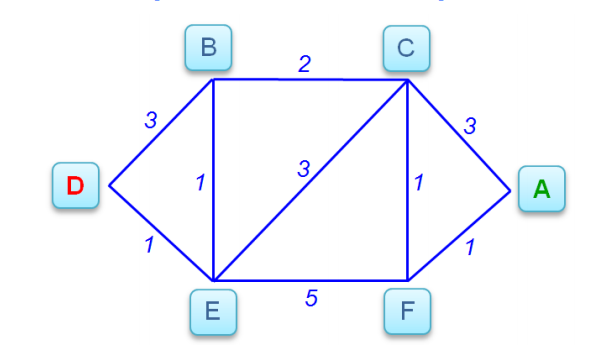

<span style="color:red;margin-left: 70px;font-size:18px;">Résolution</span>

On parcourt tous les sommets du graphe et on fait le choix de ne retenir que la plus petite distance entre le sommet de départ et le sommet considéré.

Dans le cas de l'algorithme de Dijkstra, le choix d'optimisation local permet la résolution du problème de façon optimale

<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

In [3]:
Nvilles = 6

#################### Création de la matrice d'adjacence du graphe
L0 = [0,3,1,0,0,0] # 1ere ligne : Obligatoirement le sommet de départ
L1 = [3,0,1,2,0,0] # Lorsque deux sommets ne sont pas reliés ou sommet relié à lui même on met 0
L2 = [1,1,0,3,5,0] # Sinon on met la distance entre les deux sommets
L3 = [0,2,3,0,1,3]
L4 = [0,0,5,1,0,1]
L5 = [0,0,0,3,1,0] # dernière ligne : Obligatoirement le sommet d'arrivé

# MA : matrice d'adjacence du graphe
MA = [L0,L1,L2,L3,L4,L5] 


#################### Construcion du tableau DIJ retraçant toutes les étapes de l'algo
DIJ=[[1000000,"X","N"] for n in range(Nvilles)]
# Format liste DIJ : [[DISTANCE à 0,PROVENANT DE,VILLE SELECTIONNE O/N].....[..,..,..]]

           


#################### Initialisation : On commence avec la première ville, numéro 0
ville_select=0              # numéro ville sélectionnée; défaut: 0 = ville de départ
dist_interm=0               # distance entre la ville sélectionnée et la ville de départ ;défaut: 0 au départ =dist(A,A)
DIJ[0]=[0,0,"O"]            # On sélectionne la première ville. Elle est à (0)km d'elle même 


######################################################################################

while ville_select != Nvilles-1:         # Tant que l'on a pas sélectionné la dernière ville
    minimum=1000000                      # Distance minimale de toutes les distances à 0. Permet de choisir la prochaine ville à sélectionner
    for num_ville in range(1,Nvilles):           # On parcourt toutes les villes (num_ville: numéro de la ville) sauf celle de départ (O)
        if DIJ[num_ville][2]=="N":               # On ne traite que les villes non encore sélectionnées
            dist=MA[ville_select][num_ville]     # Lecture dans la MA de dist=distance entre la ville sélectionnée et chacune des autres villes non encore sélectionnées
            dist_totale=dist_interm+dist         # dist_totale=distance entre la ville sélectionnée et la ville de départ
            
            #### Pour chaque ville adjaccente on affecte la distance minimale locale (Algo Glouton) et la provenance
            if dist != 0 and dist_totale < DIJ[num_ville][0]:     # Si les villes sont adjacentes ET la nouvelle distance à 0 est plus petite que celle indiquée dans DIJ
                DIJ[num_ville][0]=dist_totale    # remplacement par la distance la plus courte dans le tableau DIJ
                DIJ[num_ville][1]=ville_select   # remplacement de la provenance possédant la plus courte distance
            
            #### Choix de la prochaine ville sélectionnée
            if DIJ[num_ville][0]<minimum:        # On cherche parmi les villes non sélectionnées celle qui a la plus petite distance à 0
                minimum=DIJ[num_ville][0]        # Cette distance devient "minimum"
                next_ville_select=num_ville      # La ville num_ville est la prochaine ville sélectionnée, car plus petite distance à 0
    
    
    ######  Sélection de la prochaine ville
    ville_select=next_ville_select       # next_ville_select = numéro de la prochaine ville sélectionnée
    DIJ[ville_select][2]="O"             # On sélectionne la ville pour ne plus y revenir
    dist_interm=DIJ[ville_select][0]     # dist_interm=distance entre la ville sélectionnée et la ville de départ dans le tableau DIJ
    
    
######################### Affichage du plus court chemin et de sa longueur    
chemin=list() # reconstitution du plus court chemin, en partant de la ville d'arrivée
ville=Nvilles-1
chemin.append(ville)   #On remonte l'abre de la dernière ville vers la première
while ville != 0:      #On n'utilise pas de for car on ignore le nombre de sommets par lesquels on passe
    ville=DIJ[ville][1]
    chemin.append(ville)
print ("Le plus court chemin  est : ",chemin[::-1])
print ("distance totale : ",DIJ[Nvilles-1][0])  

Le plus court chemin  est :  [0, 2, 3, 4, 5]
distance totale :  6


<span style="color:red;margin-left: 70px;font-size:18px;">Avec les élèves</span>

L'élève doit modifier l'algorithme dans le cas d'un nouveau graphe 

Objectif: construire la matrice d'adjaccence et l'implémenter

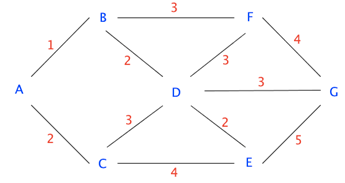

### <span style="color:red"> 5) Coloration des sommets d’un graphe</span>

@author: Julien
source des images : https://people.via.ecp.fr/~bebert/Slides%20Algo%20Total.pdf

<span style="color:red;margin-left: 70px;font-size:18px;">Problématique</span>

On cherche à obtenir une coloration des sommets d’un graphe qui satisfasse à la contrainte suivante :

Deux sommets voisins n’ont jamais la même couleur. 

Une question se pose : quel est le plus petit nombre de couleurs permettant de colorier les sommets d’un graphe sous cette contrainte ? (ce plus petit nombre est appelé nombre chromatique du graphe).

Deux algorithmes principaux :
- Algorithme glouton, naïf, non optimal mais rapide
- Backtracking: complexité élevée mais permet d’avoir un résultat optimal

#### Démonstration de la non optimalité du glouton
<img src="images/g1.png">
<img src="images/g2.png">
<img src="images/g3.png">
<img src="images/g4.png">
<img src="images/g5.png">
<img src="images/g6.png">
On trouve une solution à 4 couleurs

alors qu'il y en avait une à 3 couleurs
<img src="images/g7.png">

<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

Nous allons réaliser cette implémentation en POO, parce que c'est plus joli et plus lisible
On souhaite arriver à la même conclusion que la démonstration précédente. On va nommer les points du graphe comme ceci.
<img src="images/g8.png">
Et on va s'assurer qu'ils se colorent comme dans l'exemple

In [178]:
class point():
    def __init__(self,  nom, voisins=[],couleur=""):
        self.nom = nom
        self.voisins = voisins
        self.couleur = couleur

A = point("A")
B = point("B")
C = point("C")
D = point("D")
E = point("E")
F = point("F")
A.voisins = [B,C,D]
B.voisins = [A,C]
C.voisins = [A,B,E,F]
D.voisins = [A,F]
E.voisins = [C,F]
F.voisins = [C,D,E]

graphe = [A,B,C,D,E,F]

couleurs = ["rouge","bleu","vert","jaune","gris"]

####Algorithme de coloration des sommets
for p in graphe: #pour chaque point
    couleurTmp = couleurs.copy()
    for v in p.voisins: #pour chaque voisin
        if v.couleur in couleurTmp:
            couleurTmp.remove(v.couleur)
    p.couleur = couleurTmp[0] # prend la première couleur dispo

### Affichage du résultat    
for p in graphe: #pour chaque point
    print("Le point {} est {}".format(p.nom, p.couleur))

Le point A est rouge
Le point B est bleu
Le point C est vert
Le point D est bleu
Le point E est rouge
Le point F est jaune


Effectivement, l'algotithme glouton n'est pas optimal, et il colore le graphe conformément à l'exemple suivant
<img src="images/g9.png">

## <h2 style="font-size:30px;color:green;text-indent:80px;">V- Les alternatives aux algorithmes Glouton</h2>

Nous étudierons ici les alternatives suivantes: 

1- La force brute / application au Sac à dos

2- La programmation dynamique

3- Diviser pour mieux régner

### <span style="color:red"> 1) La force brute, application à l'algorithme du sac à dos</span>

@author: Fabrice

La force brute est la méthode qui consiste à rechercher exhaustivement toutes les solutions possibles d'un problème puis à choisir parmi celles-ci la plus optimale.

La solution donnée est par conséquent globalement optimale 

La complexité de ces algorithmes est maximale par rapport aux autres, c'est pourquoi ils sont rarement choisis. 

In [126]:
W = 15
#objetsDepart = [(1,(7,13)), (2,(4,12)), (3,(3,8)), (4,(3,10))]
objetsDepart = [(1,(7,13)), (2,(4,5)), (3,(8,3))]

def construireArbre (racine, poidsTotPere, PrixTotPere, niveau, passePar, trace):
    if niveau < len(objetsDepart): 
        if poidsTotPere + objetsDepart[niveau][1][1] <= W:
            print("niveau ", niveau, "longueur ", len(objetsDepart), " objdep ", objetsDepart[niveau][1][1], " passé par", passePar, " ", trace)

            passePar.append(objetsDepart[niveau][0])
            tmp = list(passePar)
            #si la valeur du N+1 ème élément plus la valeur du ième est inférieur à W
            racine.append([objetsDepart[niveau], [], []])
            racine.append(passePar)

            if niveau != len(objetsDepart) - 1:
                #A gauche, on ne prend pas
                construireArbre(racine[0][1], poidsTotPere ,PrixTotPere, niveau+1, tmp, "gauche")

                #A droite, on prend
                poidsTotCourant =  poidsTotPere + objetsDepart[niveau][1][1]
                prixTotCourant =  poidsTotPere + objetsDepart[niveau][1][0]
                construireArbre(racine[0][2], poidsTotCourant , prixTotCourant, niveau+1, tmp, "droite")
            else:
                print("FIN STOP LONGUEUR", niveau, "poids total ",poidsTotPere , " Prix tot ", PrixTotPere, "passé par", passePar)

                fin = (-1, (poidsTotPere, PrixTotPere))
                racine.append([fin, None, None])
        
        #on a dépassé la taille du sac, on s'arrête en stockant le poids total dans la feuille
        else:
            print("FIN dépasse taille sac", niveau, "longueur ", len(objetsDepart), " objdep ", objetsDepart[niveau][1][1], " passé par", passePar)

            fin = (-1, (poidsTotPere, PrixTotPere))
            racine.append([fin, None, None])

def afficheArbre(racine):

    if racine[0][0][0] == -1:
        print("Poids tot : ", racine[0][1][0], " Prix tot : ", racine[0][1][1])
    else:
        if racine[0][1] != None:
            afficheArbre(racine[0][1])
        if racine[0][2] != None:
            afficheArbre(racine[0][2])

passePar=list()
racine = list()              
construireArbre(racine, 0, 0, 0, passePar, "départ")
#afficheArbre(racine)

niveau  0 longueur  3  objdep  13  passé par []   départ
niveau  1 longueur  3  objdep  5  passé par [1]   gauche
niveau  2 longueur  3  objdep  3  passé par [1, 2]   gauche
FIN STOP LONGUEUR 2 poids total  0  Prix tot  0 passé par [1, 2, 3]
niveau  2 longueur  3  objdep  3  passé par [1, 2, 3]   droite
FIN STOP LONGUEUR 2 poids total  5  Prix tot  4 passé par [1, 2, 3, 3]
FIN dépasse taille sac 1 longueur  3  objdep  5  passé par [1, 2]


### <span style="color:red"> 2) La programmation dynamique</span>

<span style="color:red;margin-left: 70px;font-size:18px;">Principe</span>

La programmation dynamique est une méthode algorithmique pour résoudre des problèmes d'optimisation. Elle consiste à résoudre un problème en le décomposant en sous-problèmes, puis à résoudre les sous-problèmes, des plus petits aux plus grands en stockant les résultats intermédiaires. Elle a d'emblée connu un grand succès, car de nombreuses fonctions économiques de l'industrie étaient de ce type, comme la conduite et l'optimisation de procédés chimiques, ou la gestion de stocks. 

L'exemple le plus simple illustrant la programmation dynamique est la suite de Fibonacci. La suite de Fibonacci est définie par $F_0 = 0$, $F_1 = 1$ et $F_n = F_{n-1} + F_{n-2}$. La programmation dynamique s'appuie sur le principe d'optimalité de Bellman : une solution optimale d'un problème s'obtient en combinant des solutions optimales à des sous-problèmes. Sur l'exemple de la suite de Fibonacci, la solution $F_n$ s'obtient en additionnant $F_{n-1} et F_{n-2}$. 

L'algortihme récursif est le suivant : 

In [9]:
def fibonacci(n, a, b):
    if n==0:
        return a
    elif n==1:
        return b
    else:
        return fibonacci(n-1, a, b)+fibonacci(n-2, a, b)

On peut tester le temps d'exécution de l'algorithme en modifiant les valeurs de n (attention, pour n>40, le temps dépasse une minute sur une machine standard) :

In [13]:
import time

start_time = time.time()
print(fibonacci(40, 5, 8))
print("--- %s secondes ---" % (time.time() - start_time))

1134903170
--- 50.337080240249634 secondes ---


Le problème est que l'on refait des calculs qui ont déjà été produits. Dans l'image suivante, s'il n'y pas d'optimisation, fibo(2) sera calculé deux fois :
<img src="images/fibonacci-arbre.png">

La programmation dynamique consiste alors à stocker les valeurs des sous-problèmes pour éviter les recalculs (on va garder, par exemple, la valeur calculée dans un dictionnaire) :

In [18]:
dictionnaire = dict()

def fibonacci_optimise(n, a, b):
    if n==0:
        return a
    elif n==1:
        return b
    else:
        if dictionnaire.get(n):
            return dictionnaire.get(n)
        else:
            result = fibonacci_optimise(n-1, a, b)+fibonacci_optimise(n-2, a, b)
            dictionnaire[n]=result
            return result

On peut maintenant tester le temps d'exécution du programme :

In [21]:
import time
start_time = time.time()
print(fibonacci_optimise(1002, 5, 8))
print("--- %s seconds ---" % (time.time() - start_time))

1262027241743996257169366534803711153432873792011637768873717598849301425880152551659880282149947993889708136584785538962348100239436771893992147449837835103812540911951967569050060912009607003831549523998076513
--- 0.0 seconds ---


<span style="color:red;margin-left: 70px;font-size:18px;">Programmation dynamique sur l'algorithme du sac à dos</span>

La propriété de sous-structure optimale sont exploitée par les stratégies gloutonnes et par la programmation dynamique, on pourrait être tenté de générer une solution par programmation dynamique là où un algorithme glouton suffirait ; on pourrait aussi penser, à tort, qu’une solution gloutonne fonctionne là où la programmation dynamique est nécessaire. Pour illustrer les subtilités entre les deux techniques, intéressons-nous à deux variantes d’un problème classique d’optimisation.

La variante « entière » du problème du sac-à-dos est posée de la manière suivante. Un voleur dévalisant un magasin trouve n objets ; le ième objet vaut vi euros, et pèse wi kilogrammes, avec vi et wi entiers. Il veut que son butin ait la plus grande valeur possible, mais ne peut pas porter plus de W kilos dans son sac-à-dos, pour un certain entier W. Quels objets devra-t-il prendre ? (Cette variante est dite entière parce que chaque objet doit soit être pris soit abandonné ; le voleur ne peut pas prendre une partie d’objet ni prendre un objet plus d’une fois).

Dans la variante fractionnaire du problème du sac-à-dos, le principe est le même, mais le voleur peut prendre des fractions d’objets, au lieu d’avoir un choix binaire (oui ou non) pour chacun. On peut voir un objet de la variante "entière" comme un lingot d’or, et un objet de la variante fractionnaire comme de la poussière d’or.

Les deux problèmes du sac-à-dos exhibent la propriété de sous-structure optimale. Pour le problème entier, on considère le chargement de valeur maximale pesant au plus W kilos. Si l’on retire l’objet j du sac, le chargement restant doit être le meilleur que puisse prendre le voleur pour un poids maximum de W − wj à partir des n − 1 objets initiaux, j étant exclus. 

Pour le problème fractionnaire, on considère que si l’on retire un poids w d’un objet j dans le chargement optimal,
le reste du chargement doit être le meilleur que le voleur puisse emporter pour un poids maximum de W − w à partir des n − 1 objets initiaux, et des wj − w kilos de l’objet j.

Bien que les problèmes soient similaires, la variante fractionnaire peut être résolue par une stratégie gloutonne, contrairement à la variante entière. Pour résoudre le problème fractionnaire, on doit d’abord calculer la valeur par kilo vi/wi de chaque objet. En suivant une stratégie gloutonne, le voleur commence par prendre la plus grande quantité possible de l’article ayant la plus grande valeur par kilo. Si cet article ne suffit pas à remplir le sac-à-dos, il prend le plus possible de l’article ayant la plus grande valeur par kilo suivante, et ainsi de suite, jusqu’à ce qu’il ne puisse plus rien
emporter. Ainsi, en triant les articles en fonction de leur valeur par kilo, l’algorithme glouton s’exécute en O(n lg n). 

Pour comprendre pourquoi cette stratégie gloutonne ne peut pas s’appliquer à la variante entière, considérons l’instance du problème suivant : il existe 3 types d’articles, et le sac peut contenir 50 kilos. L’article 1 pèse 10 kilos et vaut 60 euros. L’article 2 pèse 20 kilos et vaut 100 euros. L’article 3 pèse 30 kilos et vaut 120 euros. Donc, la valeur par kilo de l’article 1 est de 6 euros par kilo, qui est plus grande que celle de l’article 2 (5 euros par kilo) ou de l’article 3 (4 euros par kilo). La stratégie gloutonne ferait donc prendre en premier l’article 1. 

<img src="images/sacadosdyn.jpg">

Néanmoins, la solution optimale fait prendre les articles 2 et 3, et délaisser 1. Les deux solutions possibles mettant en
jeu l’article 1 ne sont ni l’une ni l’autre optimales. En revanche, pour la variante fractionnaire du problème, la stratégie gloutonne, qui commence par l’article 1, aboutit à une solution optimale. Prendre l’article 1 ne résout pas la variante entière, parce que le voleur ne peut pas remplir son sac au maximum, et la place vide fait baisser la valeur effective par kilo de son chargement. Dans la variante entière, lorsqu’on envisage de déposer un article dans le sac-à-dos, on doit comparer la solution au sous-problème où l’article est inclus avec celle où l’article est exclu, puis faire un choix. 

Formulé de cette manière, le problème fait apparaître de nombreux sous-problèmes emboîtés et effectivement, la
programmation dynamique peut servir à résoudre la variante entière. 






<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

### <span style="color:red"> 3) Diviser pour mieux régner</span>

@author: Gilles

<span style="color:red;margin-left: 70px;font-size:18px;">Exemple</span>

On étudiera un cas particulier des algorithmes "Diviser pour mieux régner": La dichotomie.

On se propose de donner un encadrement à 0.0001 près de racine(2).

On fixe l'encadrement de départ à [0 ; 2]  

On définit la fonction f(x)=x²-2    

On calcule l'image du centre de classe (variable centre)

Si centre est positif:

    - On retreint l'étude sur l'intervalle [borne inf,centre] 

Sinon:

    - On retreint l'étude sur l'intervalle [centre,borne sup] 

De façon récursive, on calculera des intervalles dont l'amplitude converge vers 0.0001


La complexité des algorithmes de dichotomie est O(log(N))

<span style="color:red;margin-left: 70px;font-size:18px;">Implémentation:</span>

In [7]:
#Programme recherchant la racine positive de x²-2 par dichotomie
#Complexité O(log(N))

# fonction f(x)=x²-2
# entrée :x est un réel
# sortie : réel
def f(x):
    return x*x-2

# fonction recherche_racine
# entrées :
	# inf réel : borne inf de l'intervalle sur lequel on recherche de la racine
	# sup réel : borne sup de l'intervalle sur lequel on recherche de la racine
	# erreur réel : sup - inf
# sortie :  nombres encadrant la racine
def recherche_racine(inf,sup,erreur):
	while sup-inf>erreur:
		if f(inf)==0:				#borne inf est une racine
			print("racine=",inf)
			sup=inf					#pour sortir de la boucle
		elif f(sup)==0:				#borne sup est une racine
			print("racine=",sup)
			sup=inf					#pour sortir de la boucle
		else:
			centre=(sup+inf)/2	
			if f(inf)*f(centre)<0:
				sup=centre
				print(inf," ",sup)
			else:
				inf=centre
				print(inf," ",sup)

	print("les bornes sont ",inf," et ",sup)


recherche_racine(0,2,0.0001)

1.0   2
1.0   1.5
1.25   1.5
1.375   1.5
1.375   1.4375
1.40625   1.4375
1.40625   1.421875
1.4140625   1.421875
1.4140625   1.41796875
1.4140625   1.416015625
1.4140625   1.4150390625
1.4140625   1.41455078125
1.4140625   1.414306640625
1.4141845703125   1.414306640625
1.4141845703125   1.41424560546875
les bornes sont  1.4141845703125  et  1.41424560546875


<span style="color:red;margin-left: 70px;font-size:18px;">Avec les élèves</span>

L'implémentation sous forme récursive peut-être demandée aux élèves

In [4]:
#Programme recherchant de façon récursive la racine positive de x²-2 par dichotomie
#Complexité O(log(N))


# fonction f(x)=x²-2
# entrée :x est un réel
# sortie : réel
def f(x):
	return x*x-2

# fonction recherche_racine
# entrées :
	# inf réel : borne inf de l'intervalle sur lequel on recherche de la racine
	# sup réel : borne sup de l'intervalle sur lequel on recherche de la racine
	# erreur réel : sup - inf
# sortie :  nombres encadrant la racine
def recherche_racine(inf,sup,erreur):
	if f(inf)==0:				#borne inf est une racine
		print("racine=",inf)
	elif f(sup)==0:				#borne sup est une racine
		print("racine=",sup)
	else:	
		centre=(sup+inf)/2	
		if sup-inf<erreur:
			print("Un encadrement de racine(2) à ",erreur,"près est [", inf," ; ",sup,"]")
		else:
			if f(inf)*f(centre)<0:
				return recherche_racine(inf,centre,erreur)
			else:
				return recherche_racine(centre,sup,erreur)

                
recherche_racine(0,2,0.0001)


Un encadrement de racine(2) à  0.0001 près est [ 1.4141845703125  ;  1.41424560546875 ]


## <h2 style="font-size:30px;color:green;text-indent:80px;">VI- Séquence pédagogique</h2>
<img src="images/presentation - 07.png">
<img src="images/presentation - 08.png">
<img src="images/presentation - 09.png">
<img src="images/presentation - 10.png">
<img src="images/presentation - 11.png">
<img src="images/presentation - 12.png">


[](http://creativecommons.org/licenses/by-nc-sa/4.0/) ![Licence Creative Commons](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)